# 1번

A 실험실에서 10마리의 쥐에 대해 종양의 수는 아래와 같고, B 에 13마리 쥐들에 대해 종양의 수가 다음과 같다고 하자.

$y_A$ = (12, 9, 12, 14, 13, 13, 15, 8, 15, 6);

$y_B$ = (11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7).


다음과 같이 각 Group 에 대해서는, 종양의 수가 Poisson 분포를 가진다고 가정하자.

$\theta_A \sim gamma(120,10), \theta_B \sim gamma(12,1), p(\theta_A, \theta_B) = p(\theta_A)×p(\theta_B)$

In [3]:
import scipy
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

$f(x \mid \theta)$ = $\frac{e^{-\theta} \theta^x}{ x!}$

In [17]:
# 베이즈의 좋은점.. 패키지 없이 모든 작업을 내가 직접 수행할 수 있음. 머신러닝 모델은 불가능..
# Likelihood 이떄 likelihood 가 poisson 인데 f(x|k) = 에서 /x! 는 왜 없을까?
# 어짜피 bayes rule 을 생각해보면 likeliood 가 분자 분모 둘다에 있고, 적분은 theta(모수) 로 들어가기 때문에 그럼
# 그러므로 모수와 관련없는 constant 는 다 쳐내기 가능하기 때문이다. 그래서 여기에서 정의를 안함
def likelihood(theta, n, sy): # n 개의 sample 에 대한 likelihood
    return (theta**sy)*np.exp(-n*theta)

# posterior 생성

In [20]:
# prior parameters for theta ~ gamma(a,b)
a = 120
b = 10
prior = sp.gamma(a, scale= 1/b) # shape / rate 로 정의해야하는데 여기에서는 scale 이라서 역수로 정의

# data in group A(no bachelor's) and posterior distribution
# n=number of observed women, sy=sum of their numbers of chldren
nA = 10 # 10 마리의 쥐
syA = 117 # 거기에서 종양은 117개 
postA = sp.gamma(a+syA, scale=1/(b+nA))

In [21]:
a = 12
b = 1
prior = sp.gamma(a, scale= 1/b) # shape / rate 로 정의해야하는데 여기에서는 scale 이라서 역수로 정의

nB = 13 # 13마리의 쥐
syB = 113 # 거기에서 113 종양
postB = sp.gamma(a+syB, scale=1/(b+nB))

**Group A Bayesian Analysis**

In [23]:
# posterior mean (Group A)
(a+syA)/(b+nA)

11.727272727272727

In [24]:
# posterior mode (Group A)
(a+syA-1)/(b+nA)

11.636363636363637

In [25]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA=gamma.ppf(0.025, a+syA, scale=1/(b+nA))
ubA=gamma.ppf(0.975, a+syA, scale=1/(b+nA)) 
(lbA, ubA)

(9.790984429253319, 13.835674401534003)

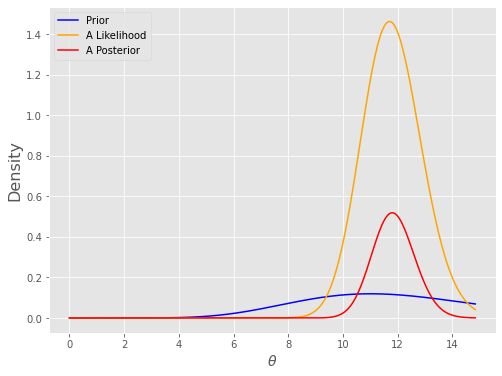

In [61]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
plt.plot(thetaslikelihood(thetas, nA, syA), label='A Likelihood', c='orange')
plt.plot(thetas,postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

**Group B Bayesian Analysis**

In [49]:
# posterior mean (Group B)
(a+syB)/(b+nB)

8.928571428571429

In [50]:
# posterior mode (Group B)
(a+syB-1)/(b+nB)

8.857142857142858

In [51]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB=gamma.ppf(0.025, a+syB, scale=1/(b+nB))
ubB=gamma.ppf(0.975, a+syB, scale=1/(b+nB))
(lbB,ubB)

(7.432064219464302, 10.560308149242363)

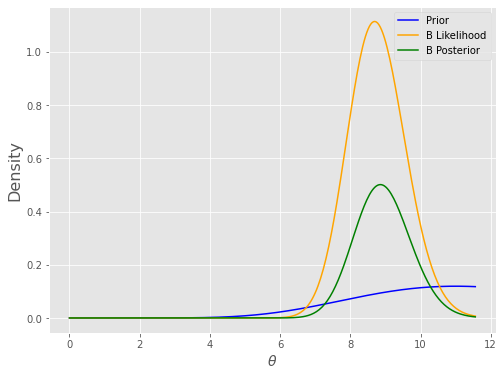

In [62]:
thetas = np.linspace(0.001, ubB+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
plt.plot(thetas, (10**-57)*likelihood(thetas, nB, syB), label='B Likelihood', c='orange')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

**Comparing Two Posterior Distributions**

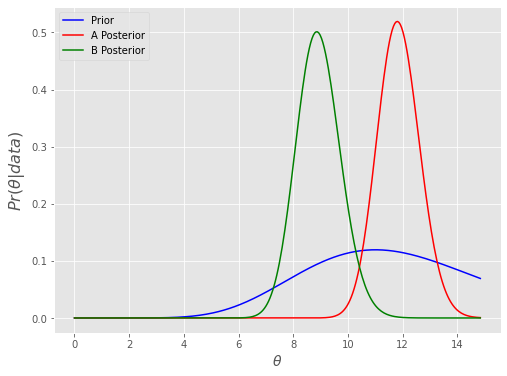

In [53]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

**Posterior Predictive Distributions for number of children**

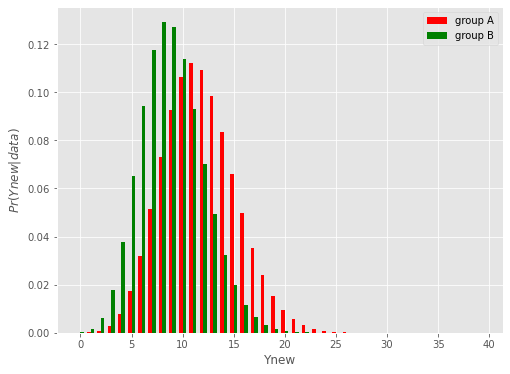

In [67]:
ynew = np.arange(40)
postpredA = sp.nbinom.pmf(ynew, a+syA, (b+nA)/(b+nA+1))
postpredB = sp.nbinom.pmf(ynew, a+syB, (b+nB)/(b+nB+1))
width = 0.35  # the width of the bars
plt.figure(figsize=(8, 6))
plt.bar(ynew - width/2, postpredA, width, label='group A', color='red')
plt.bar(ynew + width/2, postpredB, width, label='group B', color='green')
plt.xlabel('Ynew')
plt.ylabel(r'$Pr(Ynew|data)$')
plt.legend()
plt.show()

# 2번

binomial 을 exponential 형식에 끼워맞춰 생각해보겟습니다ㅃ

**Likelihood**<br>$p(y\mid\theta) = \theta^y(1-\theta)^{1-y}$

$= (\frac{\theta}{1-\theta})^y (1-\theta))$ 

$= e^{\phi y}(1-e^\phi)^{-1}\ \  \text{# $\phi$ = log[$\theta$/(1-$\theta$)]} , k(y) = y$ 



**prior**<br>$p(\theta) \sim Beta(n_0t_0,n_0(1-t_0))$ 을 prior 라 설정하자. 그러면 아래와 같은 식이 성립한다.

$p(\theta)$

$\propto \theta^{n_0 t_0 -1 }(1-\theta)^{n_0(1-t_0)-1}$

$ \propto e^{\phi(n_0t_0-1)}(1+e^\phi)^{2-n_0}$



**posterior**<br>$p(\phi \mid y)$

$\propto e^{\phi(n_0t_0 -1)}(1+e^\phi)^{2-n_0} e^{\phi y}(1+e^\phi)^{-n}$

$\propto e^{\phi(n_0 t_0 -1 +y)(1+e^\phi)^{2-n_0-n}}$

$\propto \theta^{(n_0t_0 +y)-1}(1-\theta)^{n_0(1-t_0)+(n-y)-1}$

이로부터 $p(\theta \mid y)$ ~ $beta(n_0t_0 + y , n_0 (1-t_0) + (n-y)$ 임을 알 수 있다.



**summary**<br>$\phi$ = log[$\theta$/(1-$\theta$)]  $K(y) = y$ 

prior $Beta(a,b)$ 를 a+b개의 데이터 중 a의 성공, b의 실패가 있는 data 로 해석할 수 있다는것을 기억하자.  $Beta(a,b)$ 에 대해서  $n_0 = a+b $ 이다. 즉 $n_0$ 은 데이터의 갯수라고 해석할 수 있다.

우리가 sufficient statistics $K(y) = y$ 였음을 기억하자.  $y$ 를 추정하기 위한  prior expected value of K(Y)=y 는 $E[K(Y)] = E[E[K(Y)\mid \theta]] = E[E[y\mid \theta]] = E[\theta] = \frac{a}{a+b} $ 이 된다. 즉 $t_0$ 은 prior 입장에서 추정한 $K(y)(sufficient \ \ statistics)$ 이다.  

그러므로 두 sufficient statics 추정치들은 posterior 에서 prior 와 data 의 수 비율만큼 합쳐진다. (이해석이 맞나?)

# 3번


$ Claim : \ \ \begin{aligned} &r\to \infty , \frac{pr}{1-p}=\lambda \text{ 에 따라서}\\&\text{NB}(x ;r,p) = \binom{r-1+x}{x} (1-p)^x p^r \to \text{Poi}(x ; \lambda) = \frac{\lambda^k e^{-\lambda}}{x!}\end{aligned} $

$Proof \ \ : \ p=\frac{\lambda}{r+\lambda}$  임은 쉽게 알 수 있다. 즉 이를 이용하자. 

$P(X=x) = \binom{r-1+x}{x}(1-\frac{\lambda}{r+\lambda})^r(\frac{\lambda}{r+\lambda})^x$ 

$=\frac{(r-1+x)!}{x!(r-1)!} (\frac{r}{r+\lambda})^r (\frac{\lambda}{r+\lambda})^x$ 

$= \frac{\lambda^x}{x!} \frac{(r-1+x)!}{(r-1)!} (\frac{r}{r+\lambda})^r (\frac{1}{r+\lambda})^x$ 

$= \frac{\lambda^x}{x!} (\frac{r}{r+\lambda})^r \ \ \text{since r -> inf}$

$=\frac{\lambda^k e^{-\lambda}}{x!}$


# 3-2

베이즈에서 NB 로 발생확률을 모델링할 수 있다. 이때에  같은 mean 에 대해서 분산을 NB 와 Poisson 에 대해서 비교해보자. 

$X\sim NB(x;r,p)$ 이라 하면 $E[X] = \frac{pr}{1-p}=\lambda $  ,  $Var(X) = \frac{pr}{(1-p)^2} = \lambda (\frac{\lambda}{r}+1)$ 

$X\sim Poisson(\lambda)$ 이라 하면 $E[X] =\lambda $  , $Var(X) = $ $\lambda$

즉 NB 의 경우, Variance 를 r 이라는 파라미터를 이용하여 조절할 수 있다.



# 3-3


$Claim : \ \ \begin{aligned} &n \to \infty , p\to 0, \lambda = np \text{ 에 따라서}\\&\text{Bin}(k ;N, \mu) = \binom{N}{k} \mu^k (1-\mu)^{N-k} \to \text{Poi}(k ; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}\end{aligned}$

$P(X=x)$

 $=\binom{n}{k}p^x (1-p)^{n-x} \\  =  \dfrac{n!}{(n-x)!\ x!} \left(\dfrac{\lambda}{n}\right)^x \left(1-\dfrac{\lambda}{n}\right)^{n-x}  \\ $

$ =  \dfrac{n(n-1)(n-2)\cdots(n-x+1)}{x!} \dfrac{\lambda^x}{n^x} \left(1-\dfrac{\lambda}{n}\right)^{n-x}   \\ $

$ =  \dfrac{n(n-1)(n-2)\cdots(n-x+1)}{n^x} \dfrac{\lambda^x}{x!} \left(1-\dfrac{\lambda}{n}\right)^{n-x}$



$lemma1 \ \ : \dfrac{n(n-1)(n-2)\cdots(n-x+1)}{n^x} \approx 1$

$lemma 2  : \begin{align} \left(1-\dfrac{\lambda}{n}\right)^{n-x}& = \left(1-\dfrac{\lambda}{n}\right)^n \left(1-\dfrac{\lambda}{n}\right)^{-x} \\ & \approx e^{-\lambda}\cdot 1 \end{align}$

$\text{by lem1,2 }\ \ P(X=x) =\binom{n}{k}p^x (1-p)^{n-x} \approx   \dfrac{\lambda^x e^{-\lambda}}{x!}$

